In [24]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

Load and process data

Found 1640 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

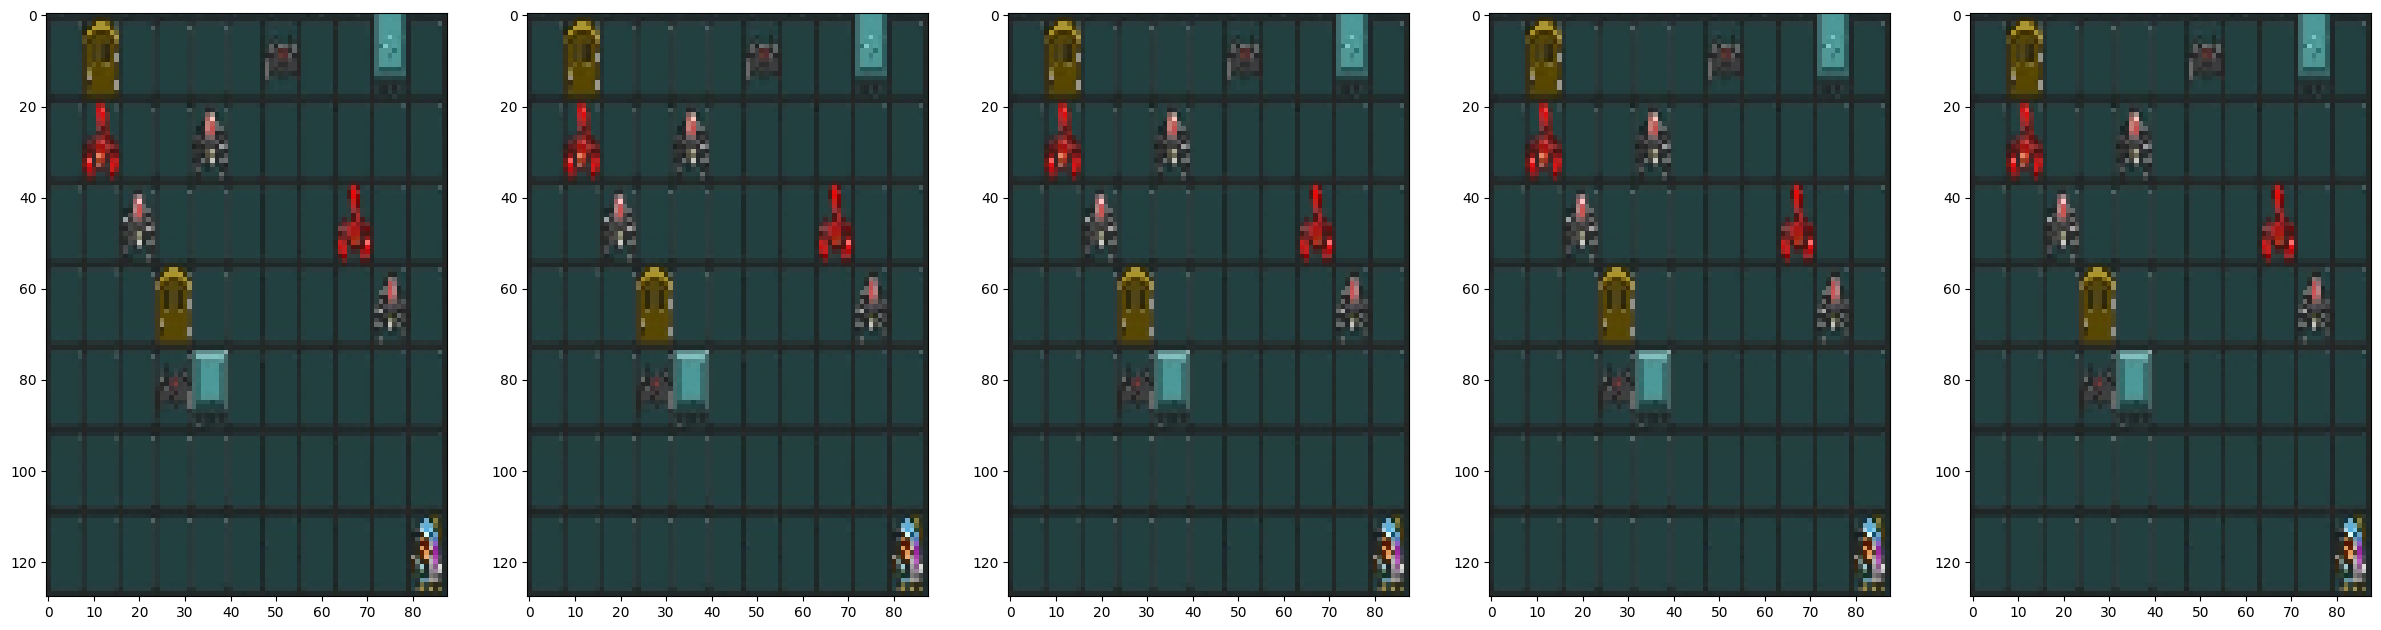

In [25]:
# Rutas a los directorios de entrenamiento y prueba
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Crear generadores de imágenes para entrenamiento y validación
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Cargar las imágenes de entrenamiento y prueba
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128, 88),
    batch_size=32,
    class_mode='binary'
)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])


test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(128, 88),
    batch_size=32,
    class_mode='binary'
)

S

In [26]:
# Definir la arquitectura del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 88, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 126, 86, 32)    │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 61, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 38400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │     2,457,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,477,121 (9.45 MB)

 Trainable params: 2,477,121 (9.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5172 - loss: 0.7668
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.5066 - loss: 0.6921
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.5368 - loss: 0.6910
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.5920 - loss: 0.6848
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6200 - loss: 0.6741
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6199 - loss: 0.6599
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.7472 - loss: 0.6267
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.7723 - loss: 0.5775
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.7836 - loss: 0.5405
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7757 - loss: 0.5120
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7568 - loss: 0.5471
Precisión en el conjunto de prueba: 0.75


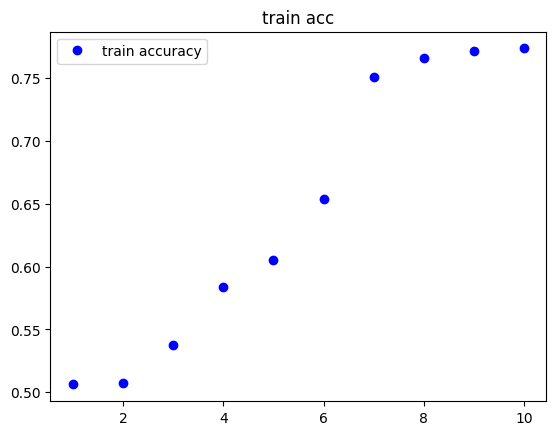

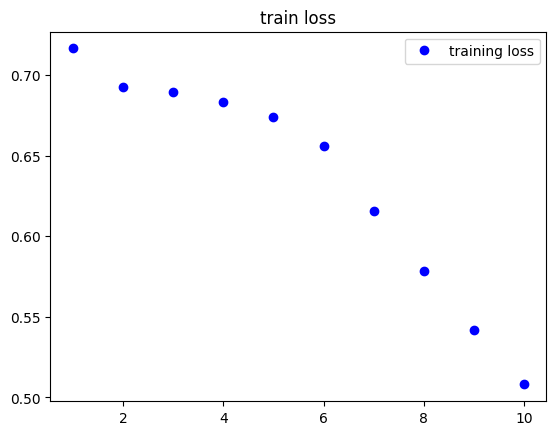

In [27]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    # steps_per_epoch=len(train_generator),
    epochs=10,
    # validation_data=test_generator,
    # validation_steps=len(test_generator)
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_generator)
print('Precisión en el conjunto de prueba:', test_acc)


acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()
